# EDA and ETL for scraped data from IPM and AskExtension data knowledge

In [1]:
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

COLOR = 'white'
plt.rcParams['text.color'       ] = COLOR
plt.rcParams['text.color'       ] = COLOR
plt.rcParams['axes.labelcolor'  ] = COLOR
plt.rcParams['xtick.color'      ] = COLOR
plt.rcParams['ytick.color'      ] = COLOR

# IPM data

In [2]:
'''
['exoticPests.json',
 'fruitItems_new.json',
 'fruitVeggieEnvironItems_new.json',
 'ipmdata_new.json',
 'pestDiseaseItems_new.json',
 'plantFlowerItems.json',
 'turfPests.json',
 'veggieItems_new.json',
 'weedItems.json']
'''
_PATH = '../data/uc-ipm/updated/'
DATA_FILE_NAMES = sorted(os.listdir(_PATH))

## Pests - IPM data

In [3]:
FILE_NAME = 'ipmdata_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 214 non-null    object
 1   urlPestNote          214 non-null    object
 2   descriptionPestNote  214 non-null    object
 3   life_cycle           214 non-null    object
 4   damagePestNote       214 non-null    object
 5   managementPestNote   214 non-null    object
 6   imagePestNote        214 non-null    object
 7   tablePestNote        214 non-null    object
 8   urlQuickTip          214 non-null    object
 9   contentQuickTips     214 non-null    object
 10  imageQuickTips       214 non-null    object
 11  video                214 non-null    object
dtypes: object(12)
memory usage: 20.2+ KB


In [4]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
tablePestNote        - 29%
urlQuickTip          - 25%
contentQuickTips     - 25%
imageQuickTips       - 24%
video                - 13%


In [5]:
df.sample(5)

,name,urlPestNote,descriptionPestNote,life_cycle,damagePestNote,managementPestNote,imagePestNote,tablePestNote,urlQuickTip,contentQuickTips,imageQuickTips,video
148,Fleas,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7419.html...,"Cat fleas, Ctenocephalides felis, are the most...","Unlike most fleas, adult cat fleas remain on t...",,"New, safer, and more effective products aimed ...","[{'caption': 'Figure 1. Adult cat flea.', 'lin...",[],http://ipm.ucanr.edu/QT/fleascard.html?src=exchbt,"Fleas are annoying to people and pets, especia...",[{'link': 'http://ipm.ucanr.edu/PMG/PESTNOTES/...,[]
19,Wild Pigs,http://ipm.ucanr.edu/PMG/PESTNOTES/pn74170.htm...,Wild pigs are not native to North America and ...,Since wild pigs in California today are descen...,Wild pigs impact ecosystems through their root...,Wild pigs can be managed through small-scale e...,"[{'caption': 'Wild pig, Sus scrofa.', 'link': ...","[<table class=""indextable"" style=""margin-botto...",,,[],[]
29,Voles (Meadow Mice),http://ipm.ucanr.edu/PMG/PESTNOTES/pn7439.html...,Six species of voles from the genus Microtus o...,Voles are mouselike rodents somewhat similar i...,Voles cause damage by feeding on a wide range ...,"To prevent vole damage, you need to manage the...","[{'caption': 'Vole (meadow mouse).', 'link': '...",[],,,[],[]
154,Elm Leaf Beetle,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7403.html...,"The elm leaf beetle, Xanthogaleruca (=Pyrrhalt...","Adults are 1/4 inch long, olive-green beetles ...","Adults chew entirely through the leaf, often i...",It is essential to correctly identify the caus...,"[{'caption': 'Adult, eggs, and first-instar la...","[<table class=""indextable"">\n <caption>Table ...",,,[],[]
171,Damping-off of Seedlings,,,,,,[],[],http://ipm.ucanr.edu/QT/dampingoffcard.html?sr...,When seedlings of vegetables or annual flowers...,[{'link': 'http://ipm.ucanr.edu/PMG/P/D-TO-PPR...,[]


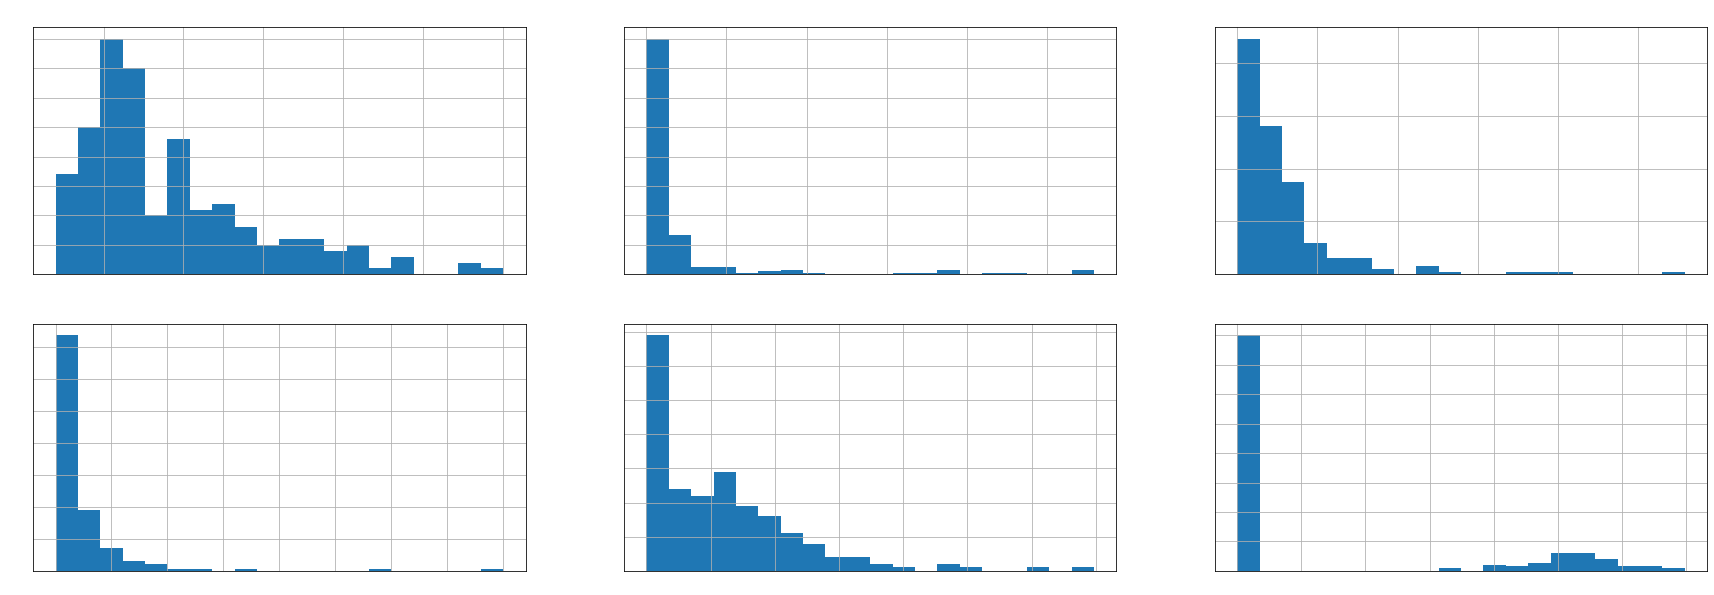

In [6]:
text_columns = ['name', 'descriptionPestNote', 'life_cycle', 'damagePestNote', 'managementPestNote', 'contentQuickTips']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### IPM Data - `ipmdata_new.json`

| column              | type                                  |
|---------------------|---------------------------------------|
| name                | string                                |
| urlPestNote         | string                                |
| descriptionPestNote | string                                |
| life_cycle          | string                                |
| damagePestNote      | string                                |
| managementPestNote  | string                                |
| imagePestNote       | [{link: " ", src: " ", caption: " "}] |
| tablePestNote       | [" ", " "]                            |
| urlQuickTip         | string                                |
| contentQuickTips    | string                                |
| imageQuickTips      | [{link: " ", src: " ", caption: " "}] |
| video               | [{videoLink: " ", videoTitle: " "}]   |

Example of the single JSON data entry:
```json
{
    "name": "Thrips",
    "urlPestNote": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7429.html?src=exchbt",
    "descriptionPestNote": "Thrips, order Thysanoptera, are tiny, slender insects with fringed wings....",
    "life_cycle": "Most adult thrips are elongate, slender, minute (less than 1/20 inch long), and h...",
    "damagePestNote": "Thrips feeding on plants can damage fruit, leaves, and shoots and very notice...",
    "managementPestNote": "Thrips are difficult to control. If management is necessary, use an integ...",
    "imagePestNote": [
        {
            "caption": "Stippling as result of greenhouse thrips feeding.",
            "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CD.013.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CD.013h.jpg?src=exchbt"
        },
        {
            "caption": "Black feces and white feeding scars from thrips.",
            "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-CD.008.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-CD.008h.jpg?src=exchbt"
        },
        ...
    ],
    "tablePestNote": [...],
    "urlQuickTip": "http://ipm.ucanr.edu/QT/thripscard.html?src=exchbt",
    "contentQuickTips": "When thrips feed, they distort or scar leaves, flowers, or fruit. Healthy w...",
    "imageQuickTips": [
        {
            "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-AD.010.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-AD.010h.jpg?src=exchbt",
            "caption": "Adult western flower thrips."
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CO.004.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CO.004h.jpg?src=exchbt",
            "caption": "Greenhouse thrips adults (black) and nymphs (yellow)."
        },
        ...
    ],
    "video": [
      {
        "videoLink": "https://www.youtube.com/watch?v=oXkp90opkjU?src=exchbt",
        "videoTitle": "Monitoring for Thrips in Avocado Orchards"
      },
      {
        "videoLink": "https://youtu.be/l2GnmTjQLp0?src=exchbt",
        "videoTitle": "UC Ag Experts Talk: Citrus Thrips"
      },
      ...
    ]
}
```
### Metadata on data source

Data about the pests. `descriptionPestNote` can be used to describe the pest. `damagePestNote` can be used to match damage description. Target can extracted from main fields as well as image and video captions. Following slots can be used for filter - `plant_name`, `problem`, `problem_description`, `target`. 
Notes:
* `descriptionPestNote`, `life_cycle`, `managementPestNote`, `contentQuickTips` - main fields.
* `imagePestNote/caption`, `imageQuickTips/caption`, `video/title` - additional fields.


## Pests - causing diseases

In [7]:
FILE_NAME = 'pestDiseaseItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            519 non-null    object
 1   url             519 non-null    object
 2   description     519 non-null    object
 3   identification  519 non-null    object
 4   life_cycle      519 non-null    object
 5   damage          519 non-null    object
 6   solutions       519 non-null    object
 7   images          519 non-null    object
dtypes: object(8)
memory usage: 32.6+ KB


In [8]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
identification       - 30%
life_cycle           - 35%
damage               - 30%


In [9]:
df.sample(5)

,name,url,description,identification,life_cycle,damage,solutions,images
300,Filbert weevils and filbertworm,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/INVERT/...,Oak acorns are commonly infested with larvae o...,,,,,[{'link': 'http://ipm.ucanr.edu/PMG/C/I-CO-COC...
279,Lead cable borer,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/INVERT/...,"Adult borers are black or brown beetles, about...",,,Feeding on plants by lead cable borers causes ...,Prune out affected plant parts. Eliminate near...,[{'link': 'http://ipm.ucanr.edu/PMG/S/I-CO-SDE...
73,Tobacco mosaic virus,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/DISEASES...,Tobacco mosaic virus affects tomatoes. Symptom...,Symptoms of tobacco mosaic virus are very simi...,,,There is no cure for viruses in infected plant...,[{'link': 'http://ipm.ucanr.edu/PMG/T/D-TO-TOM...
181,Hairy root,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/DISEASE...,The hairy root bacterium causes many small roo...,,,,Purchase and plant only high-quality nursery s...,[{'link': 'http://ipm.ucanr.edu/PMG/A/D-FL-ARH...
436,Rhizopus rot (Leak),http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/DISEASE/...,Strawberry fruit with Rhizopus rot soften rap...,Rhizopus rot is often confused with gray mold....,Rhizopus rot occurs primarily after harvest bu...,,Fruit decays can be kept to a minimum by using...,[{'link': 'http://ipm.ucanr.edu/PMG/R/D-ST-RHS...


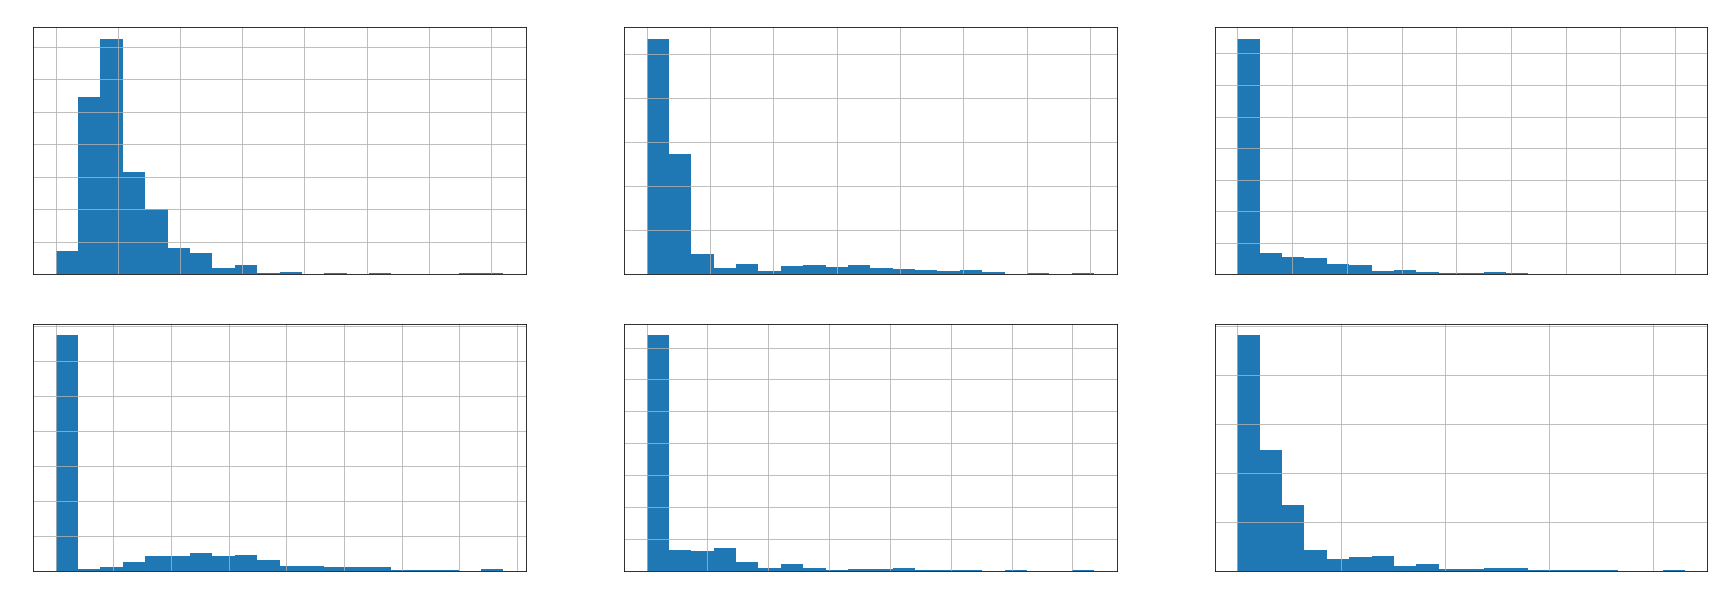

In [10]:
text_columns = ['name', 'description', 'identification', 'life_cycle', 'damage', 'solutions']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Pest Diseases - `pestDiseasesItems_new.json`

| column         | type                                  |
|----------------|---------------------------------------|
| name           | string                                |
| url            | string                                |
| description    | string                                |
| identification | string                                |
| life_cycle     | string                                |
| damage         | string                                |
| solutions      | string                                |
| images         | [{link: " ", src: " ", caption: " "}] |


Example of the single JSON data entry:

```json
{
    "name": "Stink bugs",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/stinkbug.html?src=exchbt",
    "description": "These sucking insects (family Pentatomidae) are shield shaped. Their common ...",
    "identification": "Adult stink bugs are distinguished from other insects by the large ...",
    "life_cycle": "Stink bugs develop through three life stages: egg, nymph, and adult. ...",
    "damage": "Adults suck and feed on plants with their strawlike mouthparts. Stink bugs ...",
    "solutions": "Handpick the bugs and their eggs from small plants. Eliminate groundcovers...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-AD.015.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-AD.015a.jpg?src=exchbt",
            "caption": "Adults of southern green stink bug (left), redshouldered stink bug, (upper right) and consperse stink bug."
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-EG.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-EG.001b.jpg?src=exchbt",
            "caption": "First instars of consperse stink bug and their empty egg cases."
        },
        ...
    ]
},
```

### Metadata on data source

Information on pests.

## Pests - turf (grass)

In [11]:
FILE_NAME = 'turfPests.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    39 non-null     object
 1   url     39 non-null     object
 2   text    39 non-null     object
 3   images  39 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


In [12]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [13]:
df.sample(5)

,name,url,text,images
32,Powdery mildew,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/dispowde...,"Hosts\nAll turfgrass species, but Kentucky blu...",[{'link': 'http://ipm.ucanr.edu/PMG/E/D-TG-EGR...
6,Fusarium blight,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/disfusar...,Hosts\nAnnual bluegrass (a common weed in turf...,[{'link': 'http://ipm.ucanr.edu/PMG/F/D-TG-FRO...
9,Anthracnose,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/disanthr...,Hosts\nAnnual bluegrass (a common weed in turf...,[{'link': 'http://ipm.ucanr.edu/PMG/C/D-TG-CGR...
30,Pythium blight (Grease spot),http://ipm.ucanr.edu/TOOLS/TURF/PESTS/dispyth....,Hosts\nAll turfgrass species\nSymptoms\nPythiu...,[{'link': 'http://ipm.ucanr.edu/PMG/P/D-TG-PAP...
13,Cutworms and armyworms,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/incutwm....,Identification Adults are dull brown or grayis...,[{'link': 'http://ipm.ucanr.edu/PMG/F/I-LP-FSU...


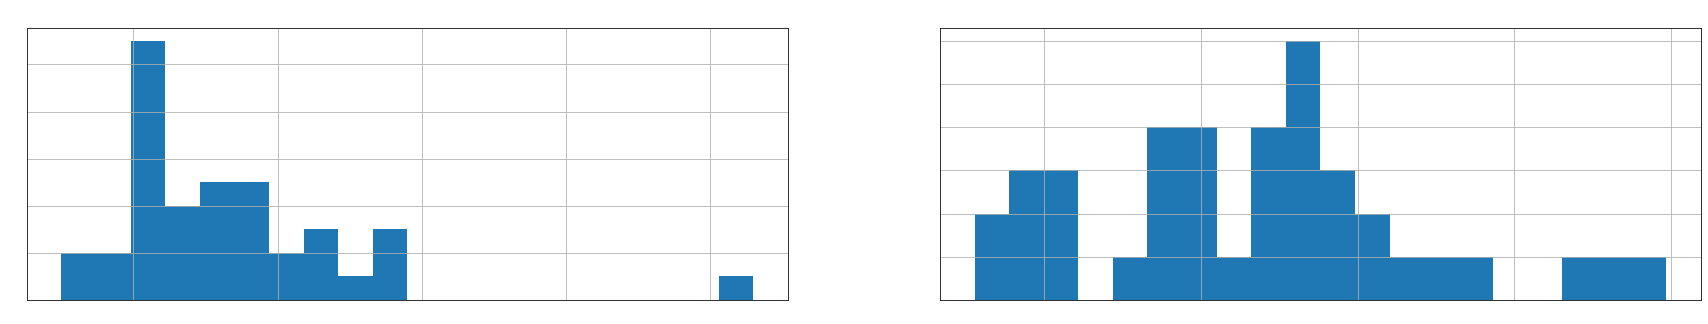

In [14]:
text_columns = ['name', 'text']
fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Turf Pests - `turfPests.json`

| column | type                                  |
|--------|---------------------------------------|
| name   | string                                |
| url    | string                                |
| text   | string                                |
| images | [{link: " ", src: " ", caption: " "}] |

Example of the single JSON data entry:

```json
{
    "name": "Fiery skipper",
    "url": "http://ipm.ucanr.edu/TOOLS/TURF/PESTS/inskipper.html?src=exchbt",
    "text": "Identification Fiery skipper adults resemble butterflies and are 1 inch...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-AD.003.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/infieryad.jpg?src=exchbt",
            "caption": "Fiery skipper adult"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-LV.009.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/inskiplv.jpg?src=exchbt",
            "caption": "Skipper larva with dark head and thoracic shield"
        },
        ...
    ]
},
```
### Metadata on data source

Inoformation on turf pests (grass).

## Pests - exotic types

In [15]:
FILE_NAME = 'exoticPests.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            31 non-null     object
 1   url             31 non-null     object
 2   description     31 non-null     object
 3   damage          31 non-null     object
 4   identification  31 non-null     object
 5   life_cycle      31 non-null     object
 6   monitoring      31 non-null     object
 7   management      31 non-null     object
 8   related_links   31 non-null     object
 9   images          29 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [16]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
description          - 10%
damage               - 3%
identification       - 3%
life_cycle           - 3%
monitoring           - 3%
management           - 3%
images               - 10%


In [17]:
df.sample(5)

,name,url,description,damage,identification,life_cycle,monitoring,management,related_links,images
15,Italian White Snail (White Garden Snail),https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'Blog post: Italian White Snail on t...,[]
10,South American Tomato Leafminer (Tuta absoluta),https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,"[{'text': 'South American Tomato Leafminer, Tu...",[]
11,Spotted Gum Psyllid,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'News: Researchers find wasp can con...,[]
27,Exotic Newcastle Disease,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'News: Why did the chicken cross the...,[]
21,Sahara Mustard,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'News: UC scientists find answers ab...,[]


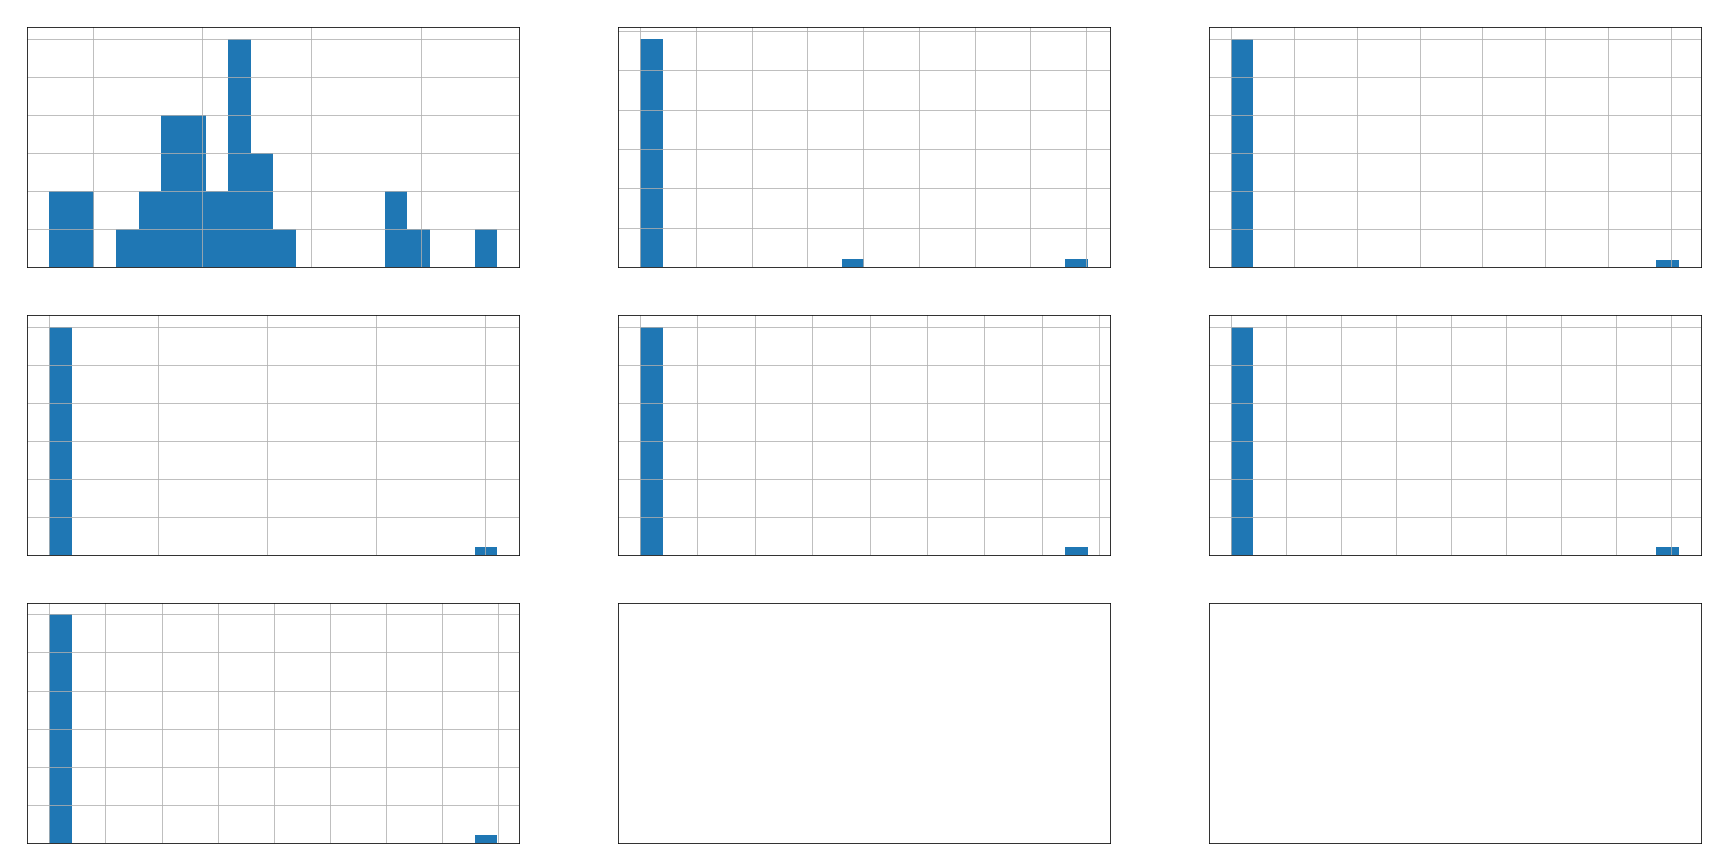

In [18]:
text_columns = ['name', 'description', 'damage', 'identification', 'life_cycle', 'monitoring', 'management']
fig, axes = plt.subplots(3, 3, figsize = (30, 15))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Exotic pests - `exoticPests.json`

| column         | type                     |
|----------------|--------------------------|
| name           | string                   |
| url            | string                   |
| description    | string                   |
| damage         | string                   |
| identification | string                   |
| life_cycle     | string                   |
| monitoring     | string                   |
| management     | string                   |
| related_links  | [{text: " ", link: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "European Grapevine Moth",
    "url": "https://www2.ipm.ucanr.edu/Invasive-and-Exotic-Pests/European-grapevine-moth/?src=exchbt",
    "description": "Lobesia botrana, the European grapevine moth, was first reported in the United ...",
    "damage": "In May and June, first-generation larvae web and feed on the flower clusters. Secon...",
    "identification": "The adult moth is approximately 0.24 to 0.3 inch (6-8 mm) long, with a wing...",
    "life_cycle": "European grapevine moth has two generations in its life cycle in northern Europ...",
    "monitoring": "Sex pheromone attracts males and is used to monitor male flights. Before bud br...",
    "management": "In countries where L. botrana is established, control measures are targeted at ...",
    "related_links": [
        {
        "text": "Grape pest management guidelines",
        "link": "http://ipm.ucanr.edu/PMG/selectnewpest.grapes.html?src=exchbt"
        },
        {
        "text": "Video presentation",
        "link": "http://stream.ucanr.org/ipm_ag_urban/evgm2011/?src=exchbt"
        }
    ],
    "images": [
        {
        "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-AD.002.html?src=exchbt",
        "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-AD.002h.jpg?src=exchbt",
        "caption": "Adult female European grapevine moth."
        },
        {
        "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-CD.004.html?src=exchbt",
        "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-CD.004h.jpg?src=exchbt",
        "caption": "Grape bunches with webbing, frass, and fungal infections."
        },
        ...
    ]
}
```

### Metadata on data source

Information on exotic pests.

Notes:
* `description`, `damage`, `identification`, `life_cycle`, `monitoring`, `management` - main fields.
* `related_links/text`, `images/caption` - additional fields.
    
Out of 15-20 source, only 2 have description field filled.

## Environmental damages - fruits and veggies

In [19]:
FILE_NAME = 'fruitVeggieEnvironItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  223 non-null    object
 1   url                   223 non-null    object
 2   description           223 non-null    object
 3   identification        223 non-null    object
 4   damage                223 non-null    object
 5   disorder_development  223 non-null    object
 6   solutions             223 non-null    object
 7   images                223 non-null    object
dtypes: object(8)
memory usage: 14.1+ KB


In [20]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
identification       - 13%
damage               - 6%
disorder_development - 2%


In [21]:
df.sample(5)

,name,url,description,identification,damage,disorder_development,solutions,images
213,Watering carrots,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,Examine your soil visually and with your hands...,,,,,[]
158,Pruning and training,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,"During the first year, do not harvest asparagu...",,,,,[]
135,Pruning,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/CULTURA...,Prune trees when they are young to minimize st...,,,,,[]
1,Frost injury,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/...,Dormant almond buds are relatively insensitive...,,,,"To reduce the likelihood of frost injury, cons...",[{'link': 'http://ipm.ucanr.edu/PMG/W/A-AM-WEA...
217,Bolting,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,Bolting occurs when flowers develop too quickl...,,,,Bolting is caused by prolonged cold temperatur...,[{'link': 'http://ipm.ucanr.edu/PMG/W/A-CC-WEA...


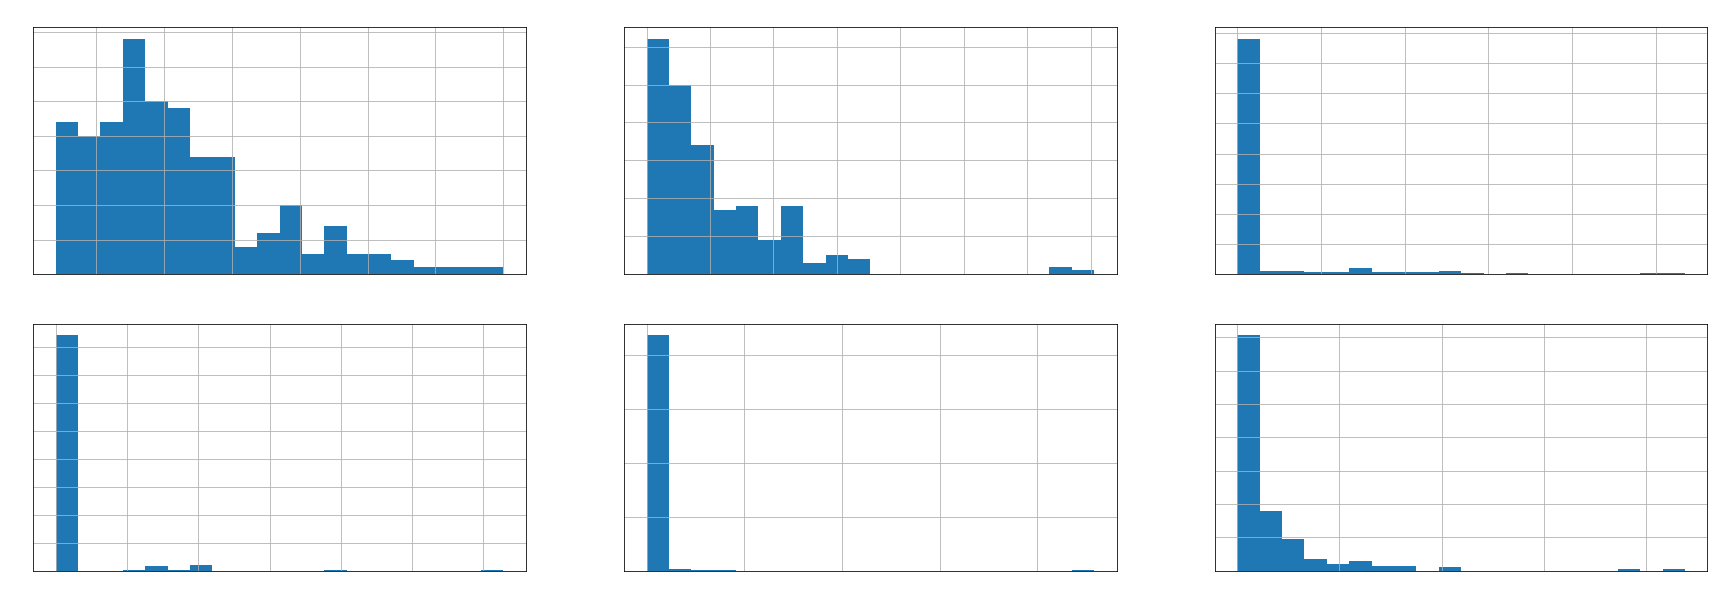

In [22]:
text_columns = ['name', 'description', 'identification', 'damage', 'disorder_development', 'solutions']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Environment Fruit and Veggie - `fruitVeggieEnvironItems_new.json`

| column               | type                                  |
|----------------------|---------------------------------------|
| name                 | string                                |
| url                  | string                                |
| description          | string                                |
| identification       | string                                |
| damage               | string                                |
| disorder_development | string                                |
| solutions            | string                                |
| images               | [{link: " ", src: " ", caption: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Wind",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/wind.html?src=exchbt",
    "description": "Wind can damage bark, flowers, foliage, fruit, and limbs of most any...",
    "identification": "Plants growing at windy sites often have smaller-than-normal leaves...",
    "damage": "Wind-damaged leaves become necrotic along the margins and tips and drop prema...",
    "disorder_development": "Wind commonly causes water deficit. If soil moisture is low, or w...",
    "solutions": "Provide plants with proper cultural care, especially appropriate irrigation...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FS.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FS.002a.jpg?src=exchbt",
            "caption": "Wind-sculptured cypress"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FO.041.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FO.041a.jpg?src=exchbt",
            "caption": "Necrotic, wind-tattered leaves"
        },
        ...
    ]
}
```

### Metadata on data source

Environment caused problems on veggies and fruites. `problem_description` can be used to find matches.

Notes:
* `name`, `description`, `identification`, `damage`, `disorder_development`, `solutions` - main fields
* `images/caption` - additional fields

## Environmental damages - weeds

In [23]:
FILE_NAME = 'weedItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         174 non-null    object
 1   url          174 non-null    object
 2   description  174 non-null    object
 3   images       174 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [24]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [25]:
df.sample(5)

,name,url,description,images
102,Miner's lettuce,http://ipm.ucanr.edu/PMG/WEEDS/miners_lettuce....,"Miner's lettuce, a native winter annual broadl...",[{'link': 'http://ipm.ucanr.edu/PMG/M/W-PO-MPE...
121,Groundcherries,http://ipm.ucanr.edu/PMG/WEEDS/groundcherries....,Groundcherry species are bushy summer annual o...,[{'link': 'http://ipm.ucanr.edu/PMG/P/W-SO-PLA...
52,Shepherd's-purse,http://ipm.ucanr.edu/PMG/WEEDS/shepherdspurse....,Shepherd's-purse is a winter annual broadleaf ...,[{'link': 'http://ipm.ucanr.edu/PMG/C/W-CF-CBU...
165,Bermudagrass,http://ipm.ucanr.edu/PMG/WEEDS/bermudagrass.ht...,Bermudagrass is a perennial grass that is freq...,[{'link': 'http://ipm.ucanr.edu/PMG/C/W-GM-CDA...
145,Large crabgrass,http://ipm.ucanr.edu/PMG/WEEDS/large_crabgrass...,Large crabgrass is a widely distributed summer...,[{'link': 'http://ipm.ucanr.edu/PMG/D/W-GM-DSA...


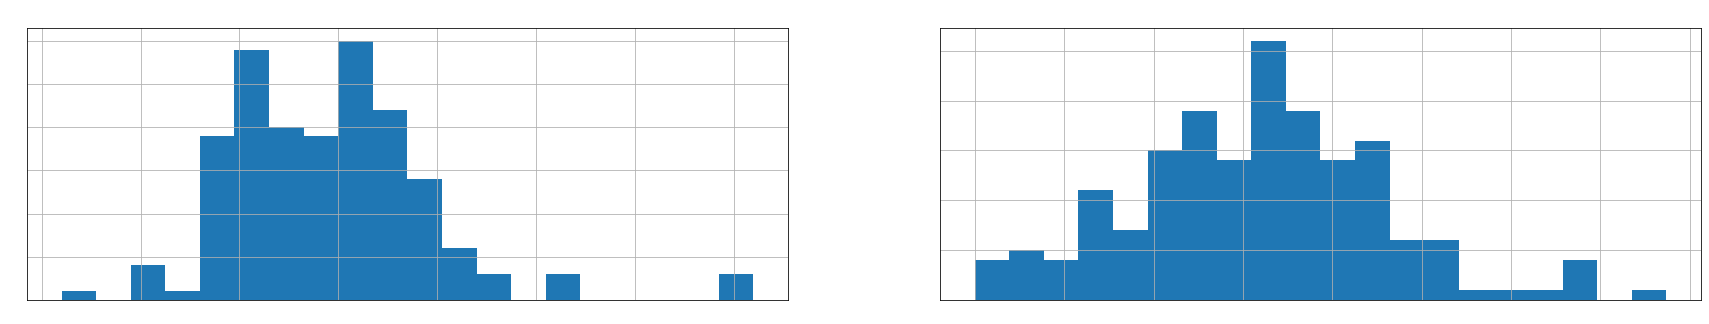

In [26]:
text_columns = ['name', 'description']
fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Weed - `weedItems.json`

| column      | type                        |
|-------------|-----------------------------|
| name        | string                      |
| url         | string                      |
| description | string                      |
| images      | [{link: " ", caption: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Gregg arrowhead",
    "url": "http://ipm.ucanr.edu/PMG/WEEDS/gregg_arrowhead.html?src=exchbt",
    "description": "Gregg arrowhead is a native aquatic perennial that occurs in the...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SMON-MP.003.html?src=exchbt",
            "caption": "top picture"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SLON-SG.001.html?src=exchbt",
            "caption": "bottom left picture"
        },
        ...
    ]
}
```

### Metadata on data source

Description of the weed (problematic). Weed is any plant growing in cultivated ground to the injury of the crop or desired vegetation.

## Information - fruits

In [27]:
FILE_NAME = 'fruitItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15 non-null     object
 1   url                  15 non-null     object
 2   cultural_tips        14 non-null     object
 3   pests_and_disorders  15 non-null     object
dtypes: object(4)
memory usage: 608.0+ bytes


In [28]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [29]:
df.sample(5)

,name,url,cultural_tips,pests_and_disorders
8,Plums and Prunes,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/plumspru...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
13,Almonds,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/almonds....,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Ants', 'link': 'http://ipm.ucanr..."
10,Nectarines and Peaches,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/nectarin...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
2,Cherries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/cherries...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Spotted wing drosophila', 'link'..."
9,Grapes,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/grapes.h...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."


### Fruits - `fruitItems_new.json`

| column              | type                      |
|---------------------|---------------------------|
| name                | string                    |
| url                 | string                    |
| cultural_tips       | [{tip: "", link: ""}]     |
| pests_and_disorders | [{problem: "", link: ""}] |

Example of the single JSON data entry:
```json
{
    "name": "Figs",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.html?src=exchbt",
    "cultural_tips": [
        {
            "tip": "Fertilizing",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/fgfertilizing.html?src=exchbt"
        },
        {
            "tip": "First-year pruning",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt"
        },
        ...
    ],
    "pests_and_disorders": [
        {
            "problem": "Ants",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7411.html?src=exchbt"
        },
        {
            "problem": "Carpenterworm",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn74105.html?src=exchbt"
        },
        ...
    ]
}
```
### Metadata on data source

Information on fruits. Name with cultural tips and problems can be used to search for the queries. Following slots can be used - `plant_name`, `problem`.

Notes:
* Concatenate `name` and `cultural_tips/tip` - additional field.
* Concatenate `name` and `pests_and_disorders` - additional field.

## Information - veggies

In [30]:
FILE_NAME = 'veggieItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 31 non-null     object
 1   url                  31 non-null     object
 2   description          31 non-null     object
 3   tips                 31 non-null     object
 4   images               31 non-null     object
 5   pests_and_disorders  31 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [31]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [32]:
df.sample(5)

,name,url,description,tips,images,pests_and_disorders
22,Peas,http://ipm.ucanr.edu/home-and-landscape/peas/i...,Peas are annual legumes that do well in cool w...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-SP-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
19,Potato,http://ipm.ucanr.edu/home-and-landscape/potato...,The edible and harvested parts of a potato pla...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/C/S-PO-CUL...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
28,Corn,http://ipm.ucanr.edu/home-and-landscape/corn/i...,Corn varieties differ significantly in time to...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-CN-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
7,Brussels sprouts,http://ipm.ucanr.edu/home-and-landscape/brusse...,"Brussels sprouts are a hardy, slow-growing, lo...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Beet armyworm', 'link': 'http://..."
3,Cantaloupe,http://ipm.ucanr.edu/home-and-landscape/cantal...,"Muskmelons, including cantaloupe and honeydew,...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-CU-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."


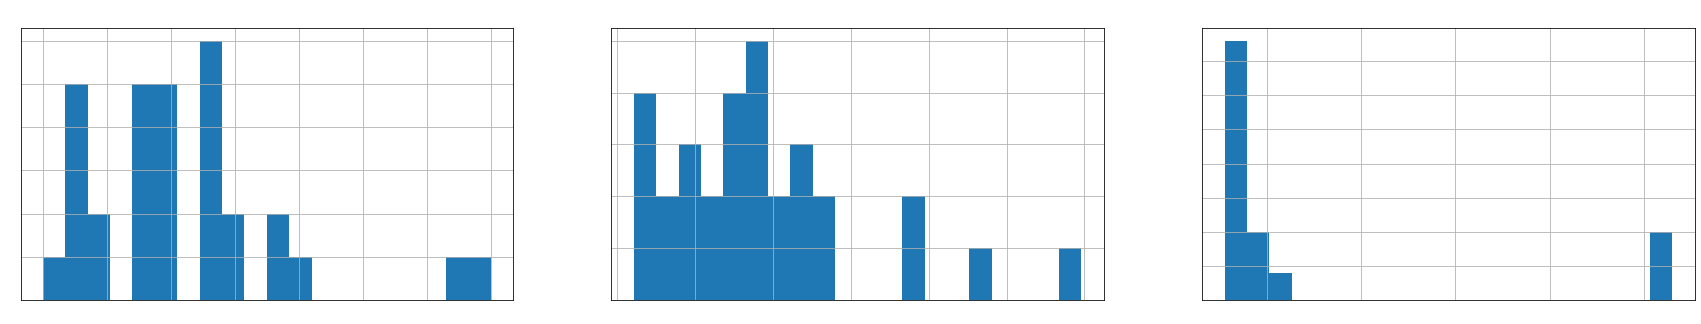

In [33]:
text_columns = ['name', 'description', 'tips']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Veggie - `veggieItems_new.json`

| column              | type                                  |
|---------------------|---------------------------------------|
| name                | string                                |
| url                 | string                                |
| description         | string                                |
| tips                | string                                |
| images              | [{link: " ", src: " ", caption: " "}] |
| pests_and_disorders | [{problem: "", link: ""}]             |

Example of the single JSON data entry:
```json
{
    "name": "Carrot ",
    "url": "http://ipm.ucanr.edu/home-and-landscape/carrot/index.html?src=exchbt",
    "description": "Carrots can be grown nearly year-round throughout California. A number of vari...",
    "tips": "Cultural practices such as proper site selection, soil preparation, planting, and wat...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/P/D-CA-PVIO-RO.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/P/D-CA-PVIO-RO.002.jpg?src=exchbt",
            "caption": "Cavity spot-induced, irregularly shaped lesions across mature carrot tap roots."
        },
        ...
    ],
    "pests_and_disorders": [
        {
            "problem": "Aphids",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt"
        },
        {
            "problem": "Carrot rust fly",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/carrotrustfly.html?src=exchbt"
        },
        ...
    ]
}
```

### Metadata on data source

Information on vegetables. `plant_name`, and `problem` can be used to search this data source.

Notes:
* `name`, `description`, `tips` - main fields.
* `images/caption` additional field.
* concatenate `name` + `pests_and_disorders` -  additional field.


## Information - flowers

In [34]:
FILE_NAME = 'plantFlowerItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 186 non-null    object
 1   url                  186 non-null    object
 2   identification       186 non-null    object
 3   optimum_conditions   186 non-null    object
 4   pests_and_disorders  186 non-null    object
 5   images               186 non-null    object
dtypes: object(6)
memory usage: 8.8+ KB


In [35]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [36]:
df.sample(5)

,name,url,identification,optimum_conditions,pests_and_disorders,images
19,Weigela,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/weigela...,Weigelas are attractive deciduous shrubs. Leav...,Weigelas are often planted as background plant...,"[{'problem': 'Mealybugs', 'link': 'http://ipm....",[{'link': 'http://ipm.ucanr.edu/PMG/C/S-WO-CAP...
128,Camphor tree,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/camphor...,Camphor trees are slow-growing evergreen trees...,Camphor trees do well in areas with full sun o...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/L/S-WO-LAU...
33,Pepper tree (California pepper tree),http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/peppert...,Plant identification Pepper trees are informal...,Pepper trees can grow in several climatic zone...,"[{'problem': 'Armored scales', 'link': 'http:/...",[{'link': 'http://ipm.ucanr.edu/PMG/PESTNOTES/...
164,Sweet pea,http://ipm.ucanr.edu/PMG/GARDEN/FLOWERS/sweetp...,Family Fabaceae (Pea family) Sweet peas are ei...,Sweet peas do well in areas with full sun. Wat...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/F/S-FL-FAB...
175,Freesia,http://ipm.ucanr.edu/PMG/GARDEN/FLOWERS/freesa...,"Freesias are fragrant perennial plants, grown ...","Freesias will do well in full sun, but will al...","[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/I/S-FL-IRI...


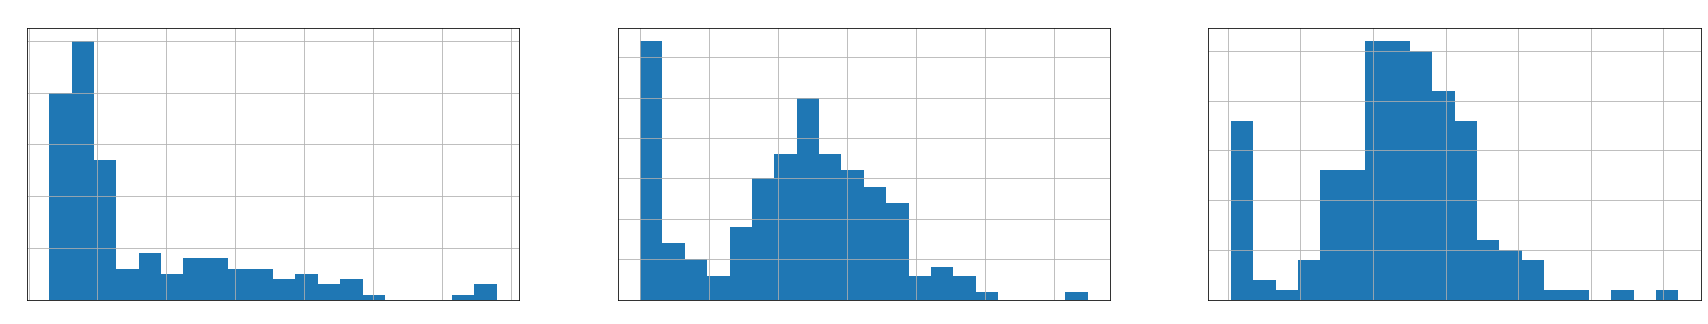

In [37]:
text_columns = ['name', 'identification', 'optimum_conditions']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Flowers - `plantFlowerItems.json`

| column              | type                        |
|---------------------|-----------------------------|
| name                | string                      |
| url                 | string                      |
| identification      | string                      |
| optimum_conditions  | string                      |
| pests_and_disorders | [{problem: " ", link: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Abelia",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/abelia.html?src=exchbt",
    "identification": "Abelias are evergreen or semievergreen deciduous shrubs. Leaves are ...",
    "optimum_conditions": "Abelias can be planted as borders or barriers. Varieties that ...",
    "pests_and_disorders": [
        {
            "problem": "Root knot nematodes",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7489.html?src=exchbt"
        },
        {
            "problem": "Mineral deficiencies",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/mineraldef.html?src=exchbt"
        },
        ...
    ],
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FL.017.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FL.017a.jpg?src=exchbt",
            "caption": "Abelia flowers"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FO.011.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FO.011a.jpg?src=exchbt",
            "caption": "LEaves of Abelia"
        }
    ]
}
```
### Metadata on data source

Description of the flowers.

* `name` and `pest_and_disorders` - main fields
* `images/caption` - additional fields


## Final transformations

There is going to be two indexes consisting of the following:

### `Problems` index: 
```json
[
    {
        "source": "PestsIPM",
        "name": "Thrips",
        "urlPestNote": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7429.html?src=exchbt",                                 # url
        "descriptionPestNote": "Thrips, order Thysanoptera, are tiny, slender insects with fringed wings...",       # description
        "life_cycle": "Most adult thrips are elongate, slender, minute (less than 1/20 inch long), and h...",       # development
        "damagePestNote": "Thrips feeding on plants can damage fruit, leaves, and shoots and very notice...",       # damage
        "managementPestNote": "Thrips are difficult to control. If management is necessary, use an integ...",       # management
        "imagePestNote": [                                                                                          # links (type - images)
            {
                "caption": "Stippling as result of greenhouse thrips feeding.",
                "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CD.013.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CD.013h.jpg?src=exchbt"
            },
            {
                "caption": "Black feces and white feeding scars from thrips.",
                "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-CD.008.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-CD.008h.jpg?src=exchbt"
            },
            ...
        ],
        "tablePestNote": [...],                                                                                     # omit
        "urlQuickTip": "http://ipm.ucanr.edu/QT/thripscard.html?src=exchbt",                                        # fill main URL if absent
        "contentQuickTips": "When thrips feed, they distort or scar leaves, flowers, or fruit. Healthy w...",       # fill description, damage, management if absent
        "imageQuickTips": [                                                                                         # merge with links (link type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-AD.010.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-AD.010h.jpg?src=exchbt",
                "caption": "Adult western flower thrips."
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CO.004.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CO.004h.jpg?src=exchbt",
                "caption": "Greenhouse thrips adults (black) and nymphs (yellow)."
            },
            ...
        ],
        "video": [                                                                                                  # merge with images (link type - video)
            {
                "videoLink": "https://www.youtube.com/watch?v=oXkp90opkjU?src=exchbt",
                "videoTitle": "Monitoring for Thrips in Avocado Orchards"
            },
            {
                "videoLink": "https://youtu.be/l2GnmTjQLp0?src=exchbt",
                "videoTitle": "UC Ag Experts Talk: Citrus Thrips"
            },
            ...
        ]
    },
    {
        "source": "PestsDiseases",
        "name": "Stink bugs",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/stinkbug.html?src=exchbt",                              # url
        "description": "These sucking insects (family Pentatomidae) are shield shaped. The...",                     # description
        "identification": "Adult stink bugs are distinguished from other insects by the la...",                     # identification
        "life_cycle": "Stink bugs develop through three life stages: egg, nymph, and adult...",                     # development
        "damage": "Adults suck and feed on plants with their strawlike mouthparts. Stink b...",                     # damage
        "solutions": "Handpick the bugs and their eggs from small plants. Eliminate ground...",                     # management
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-AD.015.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-AD.015a.jpg?src=exchbt",
                "caption": "Adults of southern green stink bug (left), redshouldered stink..."
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-EG.001.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-EG.001b.jpg?src=exchbt",
                "caption": "First instars of consperse stink bug and their empty egg cases."
            },
            ...
        ]
    },
    {
        "source": "PestsTurf",
        "name": "Fiery skipper",
        "url": "http://ipm.ucanr.edu/TOOLS/TURF/PESTS/inskipper.html?src=exchbt",                                   # url
        "text": "Identification Fiery skipper adults resemble butterflies and are 1 inch...",                       # description
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-AD.003.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/infieryad.jpg?src=exchbt",
                "caption": "Fiery skipper adult"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-LV.009.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/inskiplv.jpg?src=exchbt",
                "caption": "Skipper larva with dark head and thoracic shield"
            },
            ...
        ]
    },
    {
        "source": "PestsExotic",
        "name": "European Grapevine Moth",
        "url": "https://www2.ipm.ucanr.edu/Invasive-and-Exotic-Pests/European-grapevine-moth/?src=exchbt",          # url
        "description": "Lobesia botrana, the European grapevine moth, was first reported in the United...",         # desciption
        "damage": "In May and June, first-generation larvae web and feed on the flower clusters. Secon...",         # damage
        "identification": "The adult moth is approximately 0.24 to 0.3 inch (6-8 mm) long, with a wing...",         # identification
        "life_cycle": "European grapevine moth has two generations in its life cycle in northern Europ...",         # development
        "monitoring": "Sex pheromone attracts males and is used to monitor male flights. Before bud br...",         # monitoring (can be omitted - only 3%)
        "management": "In countries where L. botrana is established, control measures are targeted at ...",         # management
        "related_links": [                                                                                          # links (type - page)
            {
            "text": "Grape pest management guidelines",
            "link": "http://ipm.ucanr.edu/PMG/selectnewpest.grapes.html?src=exchbt"
            },
            {
            "text": "Video presentation",
            "link": "http://stream.ucanr.org/ipm_ag_urban/evgm2011/?src=exchbt"
            },
            ...
            ],
        "images": [                                                                                                 # merge with links (type - images)
            {
            "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-AD.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-AD.002h.jpg?src=exchbt",
            "caption": "Adult female European grapevine moth."
            },
            {
            "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-CD.004.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-CD.004h.jpg?src=exchbt",
            "caption": "Grape bunches with webbing, frass, and fungal infections."
            },
            ...
        ]
    },
    {
        "source": "DamagesEnvironment",
        "name": "Wind",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/wind.html?src=exchbt",                                      # url
        "description": "Wind can damage bark, flowers, foliage, fruit, and limbs of most any...",                   # description
        "identification": "Plants growing at windy sites often have smaller-than-normal leav...",                   # identification
        "damage": "Wind-damaged leaves become necrotic along the margins and tips and drop p...",                   # damage
        "disorder_development": "Wind commonly causes water deficit. If soil moisture is low...",                   # development
        "solutions": "Provide plants with proper cultural care, especially appropriate irrig...",                   # management
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FS.002.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FS.002a.jpg?src=exchbt",
                "caption": "Wind-sculptured cypress"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FO.041.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FO.041a.jpg?src=exchbt",
                "caption": "Necrotic, wind-tattered leaves"
            },
            ...
        ]
    },
    {
        "source": "DamagesWeed",
        "name": "Gregg arrowhead",
        "url": "http://ipm.ucanr.edu/PMG/WEEDS/gregg_arrowhead.html?src=exchbt",                                    # url
        "description": "Gregg arrowhead is a native aquatic perennial that occurs in the...",                       # description
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SMON-MP.003.html?src=exchbt",
                "caption": "top picture"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SLON-SG.001.html?src=exchbt",
                "caption": "bottom left picture"
            },
            ...
        ]
    }
]
```

### `Information` index:
```json
[
    {
        "source": "Fruits",
        "name": "Figs",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.html?src=exchbt",                                        # url
        "cultural_tips": [                                                                                          # links (type - tips)
            {
                "tip": "Fertilizing",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/fgfertilizing.html?src=exchbt"
            },
            {
                "tip": "First-year pruning",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt"
            },
            ...
        ],
        "pests_and_disorders": [                                                                                    # merge with links (type - problems)
            {
                "problem": "Ants",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7411.html?src=exchbt"
            },
            {
                "problem": "Carpenterworm",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn74105.html?src=exchbt"
            },
            ...
        ]
    },
    {
        "source": "Veggies",
        "name": "Carrot ",
        "url": "http://ipm.ucanr.edu/home-and-landscape/carrot/index.html?src=exchbt",                              # url
        "description": "Carrots can be grown nearly year-round throughout California. A number of vari...",         # description
        "tips": "Cultural practices such as proper site selection, soil preparation, planting, and wat...",         # management
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/P/D-CA-PVIO-RO.002.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/P/D-CA-PVIO-RO.002.jpg?src=exchbt",
                "caption": "Cavity spot-induced, irregularly shaped lesions across mature carrot tap r..."
            },
            ...
        ],
        "pests_and_disorders": [                                                                                    # merge with links (type - problems)
            {
                "problem": "Aphids",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt"
            },
            {
                "problem": "Carrot rust fly",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/carrotrustfly.html?src=exchbt"
            },
            ...
        ]
    },
    {
        "source": "Flowers",
        "name": "Abelia",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/abelia.html?src=exchbt",                                     # url
        "identification": "Abelias are evergreen or semievergreen deciduous shrubs. Leaves are ...",                # description
        "optimum_conditions": "Abelias can be planted as borders or barriers. Varieties that ...",                  # management
        "pests_and_disorders": [                                                                                    # merge with links (type - problems)
            {
                "problem": "Root knot nematodes",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7489.html?src=exchbt"
            },
            {
                "problem": "Mineral deficiencies",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/mineraldef.html?src=exchbt"
            },
            ...
        ],
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FL.017.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FL.017a.jpg?src=exchbt",
                "caption": "Abelia flowers"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FO.011.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FO.011a.jpg?src=exchbt",
                "caption": "LEaves of Abelia"
            }
        ]
    }
]
```

### Final mappings of 2 indexes

`Merged` index:
```json
{
    "source"        : "pestsIPM/pestsDiseases/pestsTurf/pestsExotic/damagesEnvironment/damagesWeed/infoFruits/infoVeggies/infoFlowers",
    "name"          : "text",
    "url"           : "url",
    "description"   : "text",
    "identification": "text",
    "development"   : "text",
    "damage"        : "text",
    "management"    : "text",
    "links": [
        {
            "type"      : "images/video/page/tips/problems",
            "title"     : "...",
            "src"       : "urlSource",
            "link"      : "urlAdditional"
        },
        ...
    ]
    # columns from AskExtension
    # source    : askextension
    # title     : name
    # question  : description
    # tags      : links (type - tag)
    # answers   : links (type - answer)
}
```

## ETL of data

In [3]:
finalDf = pd.DataFrame()
cols = ['source', 'url', 'name', 'description', 'identification', 'development', 'damage', 'management', 'links']

def pestsIPM():
    # -------------------------------------------- Pests IPM
    print(f'Merging pests IPM...')
    FILE_NAME = 'ipmdata_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name urlPestNote descriptionPestNote life_cycle damagePestNote managementPestNote imagePestNote tablePestNote urlQuickTip contentQuickTips imageQuickTips video
    final schema:
    source url name description identification development damage management links
    '''

    df['source']            = 'pestsIPM'
    df['identification']    = ''

    df.rename(columns = {
        'urlPestNote'           : 'url'         ,
        'name'                  : 'name'        ,
        'descriptionPestNote'   : 'description' ,
        'life_cycle'            : 'development' ,
        'damagePestNote'        : 'damage'      ,
        'managementPestNote'    : 'management'  ,
        'imagePestNote'         : 'links'       ,
    }, inplace = True)

    df.loc[df['url'         ] == '', 'url'          ] = df[df['url'          ] == '']['urlQuickTip'      ]
    df.loc[df['description' ] == '', 'description'  ] = df[df['description'  ] == '']['contentQuickTips' ]

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['imageQuickTips'] = df['imageQuickTips'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['video'] = df['video'].apply(lambda l: [
        {
            'type'  : 'video'           , 
            'src'   : i['videoLink']    , 
            'link'  : ''                ,
            'title' : i['videoTitle']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['imageQuickTips' ]), axis = 1)
    df.apply(lambda x: x['links'].extend(x['video'          ]), axis = 1)

    df = df[cols]
    
    return df

df = pestsIPM()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def pestsDiseases():
    # -------------------------------------------- Pests diseases
    print(f'Merging pests diseases...')
    FILE_NAME = 'pestDiseaseItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description identification life_cycle damage solutions images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'] = 'pestsDiseases'

    df.rename(columns = {
        'life_cycle'    : 'development' ,
        'damagePestNote': 'damage'      ,
        'solutions'     : 'management'  ,
        'images'        : 'links'       ,
    }, inplace = True)


    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = pestsDiseases()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def pestsTurf():
    # -------------------------------------------- Turf pests
    print(f'Merging turf pests...')
    FILE_NAME = 'turfPests.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url text images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'pestsTurf'
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''

    df.rename(columns = {
        'text'  : 'description' ,
        'images': 'links'       ,
    }, inplace = True)


    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = pestsTurf()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def pestsExotic():
    # -------------------------------------------- Exotic pests
    print(f'Merging exotic pests...')
    FILE_NAME = 'exoticPests.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description damage identification life_cycle monitoring management related_links images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'] = 'pestsExotic'

    df.rename(columns = {
        'life_cycle': 'development' ,
        'images'    : 'links'      ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda d: d if isinstance(d, list) else [])

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['related_links'] = df['related_links'].apply(lambda l: [
        {
            'type'  : 'page'    , 
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['text']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['related_links' ]), axis = 1)

    df = df[cols]

    return df

df = pestsExotic()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def damagesEnvironment():
    # -------------------------------------------- Fruit and veggie damages
    print(f'Merging fruit and veggie damages...')
    FILE_NAME = 'fruitVeggieEnvironItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description identification damage disorder_development solutions images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'] = 'damagesEnvironment'

    df.rename(columns = {
        'disorder_development'  : 'development' ,
        'solutions'             : 'management' ,
        'images'                : 'links'      ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = damagesEnvironment()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def damagesWeed():
    # -------------------------------------------- Weed damages
    print(f'Merging weed damages...')
    FILE_NAME = 'weedItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'damagesWeed'
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''

    df.rename(columns = {'images': 'links'}, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['link']     , 
            'link'  : ''            ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = damagesWeed()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoFruits():
    # -------------------------------------------- Fruits information
    print(f'Merging fruits information...')
    FILE_NAME = 'fruitItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url cultural_tips pests_and_disorders
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'infoFruits'
    df['description'    ] = ''
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''
    
    df.rename(columns = {'cultural_tips': 'links'}, inplace = True)

    df['links'] = df['links'].apply(lambda d: d if isinstance(d, list) else [])

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'tips'    , 
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['tip']  
        } for i in l])

    df['pests_and_disorders'] = df['pests_and_disorders'].apply(lambda l: [
        {
            'type'  : 'problem' ,
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['problem']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['pests_and_disorders' ]), axis = 1)

    df = df[cols]
    return df

df = infoFruits()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoVeggies():
    # -------------------------------------------- Veggies information
    print(f'Merging veggies information...')
    FILE_NAME = 'veggieItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description tips images pests_and_disorders
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'infoVeggies'
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    
    df.rename(columns = {
        'tips'                  : 'management'  ,
        'images'                : 'links'       ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'images'      , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['pests_and_disorders'] = df['pests_and_disorders'].apply(lambda l: [
        {
            'type'  : 'problem' ,
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['problem']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['pests_and_disorders' ]), axis = 1)

    df = df[cols]

    return df

df = infoVeggies()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoFlowers():
    # -------------------------------------------- Flowers information
    print(f'Merging flowers information...')
    FILE_NAME = 'plantFlowerItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url identification optimum_conditions pests_and_disorders images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'infoFlowers'
    df['description'    ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''

    df.rename(columns = {
        'optimum_conditions'    : 'management'  ,
        'images'                : 'links'       ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'images'      , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['pests_and_disorders'] = df['pests_and_disorders'].apply(lambda l: [
        {
            'type'  : 'problem' ,
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['problem']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['pests_and_disorders' ]), axis = 1)

    df = df[cols]

    return df

df = infoFlowers()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def _clean(text):
    '''
    Fix encodings and remove escape and redundant whitespace characters from text.
    '''
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

colsVector = ['name', 'description', 'identification', 'development', 'damage', 'management']
for c in colsVector:
    finalDf[c] = finalDf[c].apply(_clean)

print(f'Fix encodings and remove escape and redundant whitespace characters from text.')
print(f'------------------------------------------------')

print(f'Final dataframe shape: {finalDf.shape    }')
print(f'FINISHED')

finalDf.sample(5)

Merging pests IPM...
Final dataframe shape: (214, 9)
------------------------------------------------
Merging pests diseases...
Final dataframe shape: (733, 9)
------------------------------------------------
Merging turf pests...
Final dataframe shape: (772, 9)
------------------------------------------------
Merging exotic pests...
Final dataframe shape: (803, 9)
------------------------------------------------
Merging fruit and veggie damages...
Final dataframe shape: (1026, 9)
------------------------------------------------
Merging weed damages...
Final dataframe shape: (1200, 9)
------------------------------------------------
Merging fruits information...
Final dataframe shape: (1215, 9)
------------------------------------------------
Merging veggies information...
Final dataframe shape: (1246, 9)
------------------------------------------------
Merging flowers information...
Final dataframe shape: (1432, 9)
------------------------------------------------
Fix encodings and rem

,source,url,name,description,identification,development,damage,management,links
1048,damagesWeed,http://ipm.ucanr.edu/PMG/WEEDS/common_yarrow.h...,Common yarrow,Common yarrow is a perennial broadleaf plant w...,,,,,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."
447,pestsDiseases,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/INVERT/...,Pine and spruce spider mites,Various species of mites (Tetranychidae) can c...,Oligonychus subnudus and O. milleri occur on p...,Spider mites and the predatory mites (Phytosei...,Feeding by Oligonychus spp. mites causes conif...,The most important management actions are to c...,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."
218,pestsDiseases,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/ca...,Cabbage maggot,"Cabbage maggot larvae are small, legless, and ...",,The life cycles of maggots on vegetable crops ...,Maggots tunnel through root systems of all col...,Prevention is the best management strategy. Av...,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."
1024,damagesEnvironment,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,Watering beans,Consistent and adequate irrigation is required...,,,,,[]
867,damagesEnvironment,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/...,Watering grapes,Irrigation is essential for good vine growth a...,,,,,[]


# AskExtension Data

## Data

In [4]:
import json

PATH = '../data/askextension/2020-08-20/'
FILE_NAMES = [PATH + f for f in sorted(os.listdir(PATH))]

with open(FILE_NAMES[0]) as f:
    f = json.load(f)
    print(json.dumps(f[0], indent = 2))

{
  "faq-id": 3,
  "title": "When can I plant blue spruce trees in Colorado? #109900",
  "created": "2012-12-03 15:53:47",
  "updated": "2012-12-03 17:47:21",
  "tags": [
    "trees and shrubs"
  ],
  "state": "Colorado",
  "county": "El Paso County",
  "question": "I need to plant two blue spruce trees that are currently in 24\" diameter plastic containers with drain holes in the bottom sides.\n\nLocation: northeast side of Colorado Springs.\n\nThese trees are currently outside on the patio and susceptible to the wind and sun. The trees were watered this past Saturday and seem to be healthy.\n\nQuestion: Can these trees be planted now? Currently the soil is not frozen and night time temps are 35 to 40 degrees.\n\nI have downloaded and read CMG GardenNotes #633 as a reference.\n\nAny advice would be greatly appreciated. ",
  "answer": {
    "1": {
      "response": "Jerry, \nyou can plant them now (a) OR temporarily \"plant\" them, still in containers, so that roots have some insulatio

Data constists 4 files:
- 2012-2014.json
- 2014-2016.json
- 2016-2018.json
- 2018-2020.json

It is a list of dictionary objects with following fields:
- `faq-id` - ID of the ticket
- `title` - title of the ticket along ID of the ticket (__other__ ID)
- `created` - ticket creating date
- `updated` - ticket last update date
- `tags` - list of tags
- `state` - state ticket was created in
- `county` - county ticket was created in
- `question` - question that has been posted
- `answer` - response lists presented in numbered dictionary data type

## ETL

Following transformations are performed:
- merge source into single JSON file
- filter out ticket from all states except _California_
- retrive ticket ID from title
- create URL of ticket
- clean long text columns - `title`, `question`, `answer`
- create new column out of `title` and `question`
- remove tickets that have less than 3 words in `title` and `quesiton` combined
- limit the number of characters to 1000 for `title`, `question`, `answer` columns

Modify `STATE_FILTER` and `MIN_WORD_COUNT` variables accordingly.

In [5]:
import sys
import re

from string import punctuation as pn


STATE_FILTER    = ['California']
MIN_WORD_COUNT  = 3

ASKEXTENSION_QUESTION_URL = 'https://ask2.extension.org/kb/faq.php?id='

# Combines the data files into one and returns it.
df = pd.DataFrame()
for f in FILE_NAMES:
    df = df.append(pd.read_json(f), ignore_index = True)

df['source'] = 'askExtension'

# Convert 'faq-id' to str type
df['faq-id'] = df['faq-id'].astype(str)

# Leave tickets from California state
df = df[df['state'].isin(STATE_FILTER)]

# Add the URL and leave blank URL for questions with no ID
df['url'] = [
    f"{ASKEXTENSION_QUESTION_URL}{ticket_no}" if len(ticket_no) == 6 else ""
    for ticket_no in df['title'].str.split('#').str[-1]
]

# Add the ticket number from title and leave blank for questions without
df['ticket-no'] = [
    ticket_no if len(ticket_no) == 6 else ""
    for ticket_no in df['title'].str.split('#').str[-1]
]

df.rename(columns = {'faq-id': 'faq_id', 'ticket-no': 'ticket_no'}, inplace = True)

def _clean(text):
    '''
    Fix encodings and remove escape and redundant whitespace characters from text.

    Examples with non-ascii characters - 110358, 147160
    Examples with redundant whitespace - 117069, 127760

    See: https://stackoverflow.com/a/53821967/5480536
    '''
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def _transform_answer(answer_dict):
    '''
    Convert answer field from a dictionary to a list.
    '''
    answers = [{}] * len(answer_dict)
    
    for k, v in answer_dict.items():
        # clean the response up
        v = {
            'type'  : 'answer'  ,
            'src'   : ''        , 
            'link'  : ''        ,
            'title' : _clean(v['response']),
        }
        answers[int(k) - 1] = v
    
    return answers

# Transform answer for consistency with IPM data
df['links'] = df['answer'].apply(_transform_answer)

# Strip all spaces and remove non-ascii characters from text fields
for column in ['state', 'title', 'question']:
    df[column] = df[column].apply(_clean)

def _transform_title(title):
    '''
    Remove question ID from title, and append '.' in the end
    if no punctuation was detected.

    Example with '#' - 437259
    Example with '...' - 437264
    '''
    title = ''.join(title.split('#')[:-1]).strip().strip('...')
    
    # add a '.' if it does not yet end with a punctuation
    title = title if (title and title[-1] in pn) else title + '.'
    
    return title

# Clean ID and '...' from title, and append punctuation if not present
df['name'] = df['title'].apply(_transform_title)

def _merge_title_question(df):
    '''
    Create new column from questions and title,
    but only if it is not already exactly in the question.
    '''
    titles      = df['name'     ].tolist()
    questions   = df['question' ].tolist()
    
    tqs = [
        question
        if (title and question.startswith(title[:-1]))
        else title + " " + question
        for (title, question) in zip(titles, questions)
    ]

    return tqs

# Create new column from `title` and `question`, or only question
# if title is exactly the question     
df['description'] = _merge_title_question(df)
    
# Remove questions with small number words in title-question
if MIN_WORD_COUNT:
    df = df[df['description'].str.split().str.len() > MIN_WORD_COUNT]

df = df.loc[:, ['source', 'url', 'name', 'description', 'links']]
df.sample(5)

,source,url,name,description,links
82465,askExtension,https://ask2.extension.org/kb/faq.php?id=402807,Silk Floss Tree oozing sap from its leaves.,Silk Floss Tree oozing sap from its leaves. I ...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
32270,askExtension,https://ask2.extension.org/kb/faq.php?id=240287,Peach pits.,Peach pits. Can a dog have medical problems if...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
76079,askExtension,https://ask2.extension.org/kb/faq.php?id=381809,tree infestation.,tree infestation. Appreciate any help to ident...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
3771,askExtension,https://ask2.extension.org/kb/faq.php?id=131381,dehydrating slilghtly damaged peaches.,dehydrating slilghtly damaged peaches. From Sa...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
28926,askExtension,https://ask2.extension.org/kb/faq.php?id=228081,jalapeno plants.,"jalapeno plants. I live in Fresno, CA and I ju...","[{'type': 'answer', 'src': '', 'link': '', 'ti..."


## Final mapping

`Merged` index:
```json
{
    "source"        : "askExtension",
    "name"          : "text",           # title
    "url"           : "url",            # url
    "description"   : "text",           # title_question
    "links": [
        {
            "type"      : "tag/answer",
            "title"     : "...",
            "src"       : "urlSource",
            "link"      : "urlAdditional"
        },
        ...
    ]
    # columns from AskExtension
    # identification
    # development
    # damage
    # management
}
```

In [6]:
cols = ['source', 'url', 'name', 'description', 'identification', 'development', 'damage', 'management', 'links']
'''
columns in source:
source  url name description links
final schema:
source url name description identification development damage management links    
'''
df['identification' ] = ''
df['development'    ] = ''
df['damage'         ] = ''
df['management'     ] = ''
df = df[cols]
df.sample(5)

,source,url,name,description,identification,development,damage,management,links
10562,askExtension,https://ask2.extension.org/kb/faq.php?id=158942,Hi I just recently am gr.,"Hi I just recently am gr. Hi, I just recently ...",,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
68312,askExtension,https://ask2.extension.org/kb/faq.php?id=355035,Shrub in my back yard.,"Shrub in my back yard. This is a large, woody ...",,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
90400,askExtension,https://ask2.extension.org/kb/faq.php?id=425888,What type of grass is this and how to get rid ...,What type of grass is this and how to get rid ...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
49766,askExtension,https://ask2.extension.org/kb/faq.php?id=298626,Yellowing Pondarosa pine.,Yellowing Pondarosa pine. It looks really yell...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
23179,askExtension,https://ask2.extension.org/kb/faq.php?id=207922,trees in a sandbox.,trees in a sandbox. I planted 4 fruitless pear...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."


In [7]:
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')

Final dataframe shape: (3603, 9)
------------------------------------------------


# Embedding text fields into vectors and stripping text fields for saving into ES

In [8]:
import sys

sys.path.insert(1, os.path.realpath(os.path.pardir))

os.environ['STAGE'      ] = 'dev'
os.environ['ES_USERNAME'] = 'elastic'
os.environ['ES_PASSWORD'] = 'changeme'
os.environ['ES_HOST'    ] = 'http://localhost:9200/'
os.environ['ES_IMITATE' ] = 'false'

import config

INFO:config:----------------------------------------------
INFO:config:Environment variables for DEV environment
INFO:config:- debug           = True
INFO:config:- es_search_size  = 100
INFO:config:- es_cut_off      = 0.4
INFO:config:- es_top_n        = 5
INFO:config:- es_ask_weight   = 0.6
INFO:config:----------------------------------------------
INFO:config:----------------------------------------------
INFO:config:Elasticsearch configuration:
INFO:config:- host                    = https://qa.es.chat.ask.eduworks.com/
INFO:config:- username                = elastic
INFO:config:- password                = changeme
INFO:config:- tfhub_embedding_url     = https://tfhub.dev/google/universal-sentence-encoder/4
INFO:config:- tfhub_cache_dir         = /var/tmp/tfhub_modules
INFO:config:----------------------------------------------
INFO:config:----------------------------------------------
INFO:config:Elasticsearch indexes:
INFO:config:- combined index          = combined
INFO:config:----

### Embedding by splitting text to `CHUNK_SIZE` character chunks

In [9]:
# ---------------------------------------- Dataframe embeddings - text fields
CHUNK_SIZE = 1000

finalDf['vectors'] = np.empty((len(finalDf), 0)).tolist()

colsVector = ['name', 'description', 'identification', 'development', 'damage', 'management']
print(f'Final DF: Embedding columns - {colsVector}')
for i, r in finalDf.iterrows():
    c_vectors = []
    for c in colsVector:
        t = r[c]
        chunks, chunk_size = len(t), CHUNK_SIZE
        ts = [t[i:i+chunk_size] for i in range(0, chunks, chunk_size)]
        if len(ts) == 0:
            ts.append('')
        vectors   = config.embed(ts).numpy().tolist()
        for i, t in enumerate(vectors):
            c_vectors.append({'vector': vectors[i], 'name': c + '_' + str(i)})
    r['vectors'] = c_vectors

# ---------------------------------------- Dataframe embeddings - links fields
finalDf['vectors_links'] = np.empty((len(finalDf), 0)).tolist()

tmp = finalDf['links']
print('Final DF: Embedding column - links')
for i, r in enumerate(tmp):
    if len(tmp.iloc[i]) > 0:
        c_vectors = config.embed([i['title'] for i in tmp.iloc[i]]).numpy().tolist()
        finalDf['vectors_links'].iloc[i].extend([{'vector': v, 'order': i} for i, v in enumerate(c_vectors)])
        

finalDf.sample(5)

Final DF: Embedding columns - ['name', 'description', 'identification', 'development', 'damage', 'management']
Final DF: Embedding column - links


,source,url,name,description,identification,development,damage,management,links,vectors,vectors_links
2917,askExtension,https://ask2.extension.org/kb/faq.php?id=379533,I have these in my house. Can I get an ID.,I have these in my house. Can I get an ID. I l...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.02537430077791214, -0.012461772...","[{'vector': [-0.03053200989961624, 0.061735048..."
1863,askExtension,https://ask2.extension.org/kb/faq.php?id=233345,hemp dogbane Apocynum.,"hemp dogbane Apocynum. Hi, didn't see anything...",,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.019808989018201828, 0.023636085...","[{'vector': [-0.036317817866802216, -0.0217840..."
1647,askExtension,https://ask2.extension.org/kb/faq.php?id=185401,Indigo Rose Leaf Curl.,Indigo Rose Leaf Curl. My tomato plant's leave...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.03143959119915962, -0.012114967...","[{'vector': [0.021636446937918663, 0.057339370..."
1447,askExtension,https://ask2.extension.org/kb/faq.php?id=119943,I recently put in a 62ft.,I recently put in a 62ft. row of trellised wil...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.04885242134332657, -0.046319182...","[{'vector': [0.03185632452368736, -0.047621663..."
2228,askExtension,https://ask2.extension.org/kb/faq.php?id=298332,Purple Broad Leaf Ground Cover.,Purple Broad Leaf Ground Cover. clarification:...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [-0.029515644535422325, 0.03290770...","[{'vector': [0.03154686465859413, -0.025572344..."


### Embedding by default length

In [9]:
# ---------------------------------------- Dataframe embeddings - text fields
finalDf['vectors'] = np.empty((len(finalDf), 0)).tolist()

colsVector = ['name', 'description', 'identification', 'development', 'damage', 'management']
vectors = []

for c in colsVector:
    print(f'Final DF: Embedding column - {c}')
    c_list      = finalDf[c].tolist()
    c_vectors   = config.embed(c_list).numpy().tolist()
    vectors.append(c_vectors)

for i, r in enumerate(finalDf['vectors']):
    for c in range(len(colsVector)):
        r.append({'vector': vectors[c][i], 'name': colsVector[c]})


# ---------------------------------------- Dataframe embeddings - links fields
finalDf['vectors_links'] = np.empty((len(finalDf), 0)).tolist()

tmp = finalDf['links']
print('Final DF: Embedding column - links')
for i, r in enumerate(tmp):
    if len(tmp.iloc[i]) > 0:
        c_vectors = config.embed([i['title'] for i in tmp.iloc[i]]).numpy().tolist()
        finalDf['vectors_links'].iloc[i].extend([{'vector': v, 'order': i} for i, v in enumerate(c_vectors)])
        

finalDf.sample(5)

Final DF: Embedding column - name
Final DF: Embedding column - description
Final DF: Embedding column - identification
Final DF: Embedding column - development
Final DF: Embedding column - damage
Final DF: Embedding column - management
Final DF: Embedding column - links


,source,url,name,description,identification,development,damage,management,links,vectors,vectors_links
3045,askExtension,https://ask2.extension.org/kb/faq.php?id=413321,Ants for five months. Help!,Ants for five months. Help! So I live in an ap...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.0124294962733984, -0.0093928677...","[{'vector': [0.04957588016986847, 0.0262171905..."
888,damagesEnvironment,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/...,Pruning,Apricots are pruned during the early developme...,,,,,[],"[{'vector': [-0.03255358710885048, -0.05985959...",[]
1529,askExtension,https://ask2.extension.org/kb/faq.php?id=155823,is this an termite.,is this an termite. can you look.at the attach...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [-0.03979642689228058, 0.035843439...","[{'vector': [0.03573064133524895, 0.0797966718..."
2137,askExtension,https://ask2.extension.org/kb/faq.php?id=287438,Help naming these plants trees shrubs etc?!,Help naming these plants trees shrubs etc?! Hi...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [-0.04502515494823456, -0.00485226...","[{'vector': [0.04726199805736542, 0.0234065763..."
1970,askExtension,https://ask2.extension.org/kb/faq.php?id=262713,Colorful Plum Tree Ooz.,"Colorful Plum Tree Ooz. Hello All,I have a ~20...",,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.05282450467348099, 0.0672906562...","[{'vector': [-0.010488322004675865, 0.01895380..."


In [10]:
CHAR_LIMIT = 100

if CHAR_LIMIT:
    print(f'Striping text field to {CHAR_LIMIT} characters...')

    # -------------------------------------------- Dataframe text stripping

    columnsText = ['name', 'description', 'identification', 'development', 'damage', 'management']
    for c in columnsText:
        finalDf[c] = finalDf[c].str[:CHAR_LIMIT]
    
    tmp = finalDf['links']
    for i, _ in enumerate(tmp):
        if len(tmp[i]) > 0:
            for j, _ in enumerate(tmp[i]):
                tmp[i][j]['title'] = tmp[i][j]['title'][:CHAR_LIMIT]

Striping text field to 100 characters...


## Injesting data into ES

In [11]:
mapping  = {
    "settings": {"number_of_shards": 2, "number_of_replicas": 1},
    "mappings": {
        "dynamic"   : "false",
        "_source"   : {"enabled": "true"},
        "properties": {
            "source"        : {"type": "keyword", "index": "true"},
            "url"           : {"type": "keyword", "index": "false"},

            "name"          : {"type": "keyword", "index": "false"},
            "description"   : {"type": "keyword", "index": "false"},
            "identification": {"type": "keyword", "index": "false"},
            "development"   : {"type": "keyword", "index": "false"},
            "damage"        : {"type": "keyword", "index": "false"},
            "management"    : {"type": "keyword", "index": "false"},
            "vectors"       : {
                "type"      : "nested",
                "properties": {
                    "vector": {
                        "type": "dense_vector", 
                        "dims": 512
                    },
                    "name"  : {"type": "keyword", "index": "false"}
                }
            },
            
            "links"         : {
                "type"      : "nested",
                "properties": {
                    "type"  : {"type": "keyword", "index": "false"},
                    "src"   : {"type": "keyword", "index": "false"},
                    "link"  : {"type": "keyword", "index": "false"},
                    "title" : {"type": "keyword", "index": "false"}
                }
            },
            "vectors_links" : {
                "type"      : "nested",
                "properties": {
                    "vector": {
                        "type": "dense_vector", 
                        "dims": 512
                    },
                    "order"  : {"type": "keyword", "index": "false"}
                }
            }
        }
    }
}

final_json = finalDf.to_dict('records')

In [12]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import parallel_bulk

from collections import deque

# increase the timeout if necessary
es_client = Elasticsearch([config.es_host], http_auth=(config.es_username, config.es_password), timeout = 20)

es_client.indices.delete(
    index   = config.es_combined_index, 
    ignore  = 404)
es_client.indices.create(
    index       = config.es_combined_index  , 
    settings    = config.ES_COMBINED_MAPPING['settings'], 
    mappings    = config.ES_COMBINED_MAPPING['mappings'])
# play with chunk size parameter for timed out problem
deque(parallel_bulk(es_client, actions = final_json, index = config.es_combined_index, max_chunk_bytes = 5 * 1024 * 1024), maxlen = 0)

es_client.indices.refresh()

INFO:elasticsearch:GET https://qa.es.chat.ask.eduworks.com:443/ [status:200 request:0.721s]
INFO:elasticsearch:DELETE https://qa.es.chat.ask.eduworks.com:443/combined [status:404 request:0.209s]
INFO:elasticsearch:PUT https://qa.es.chat.ask.eduworks.com:443/combined [status:200 request:1.574s]
INFO:elasticsearch:POST https://qa.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:3.487s]
INFO:elasticsearch:POST https://qa.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:4.356s]
INFO:elasticsearch:POST https://qa.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:5.505s]
INFO:elasticsearch:POST https://qa.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:5.906s]
INFO:elasticsearch:POST https://qa.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:3.114s]
INFO:elasticsearch:POST https://qa.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:2.636s]
INFO:elasticsearch:POST https://qa.es.chat.ask.eduworks.com:443

{'_shards': {'total': 4, 'successful': 2, 'failed': 0}}